In [9]:
from algos import top_down, paths_modified
import random
import msprime
import numpy as np
import matplotlib.pyplot as plt

In [35]:
rs = random.randint(1,10000)
ts = msprime.sim_ancestry(
    samples=100,
    recombination_rate=1e-8,
    sequence_length=2000,
    population_size=10_000,
    record_full_arg=True,
    random_seed=rs#6334 #7483,8131
)

#print(ts.draw_text())

sample_locs = np.linspace(0, 1, ts.num_samples)

td_paths, td_times, td_locations, td_dispersal_rate = top_down.reconstruct_node_locations(ts=ts, sample_locs=sample_locs)
pm_paths, pm_times, pm_locations, pm_dispersal_rate = paths_modified.reconstruct_node_locations(ts=ts, sample_locs=sample_locs)

14854.19┊     6   ┊  
        ┊   ┏━┻━┓ ┊  
6433.76 ┊   5   ┃ ┊  
        ┊  ┏┻━┓ ┃ ┊  
2655.83 ┊  4  ┃ ┃ ┊  
        ┊ ┏┻┓ ┃ ┃ ┊  
0.00    ┊ 0 3 2 1 ┊  
        0       2000 

[6.4294907e-05]


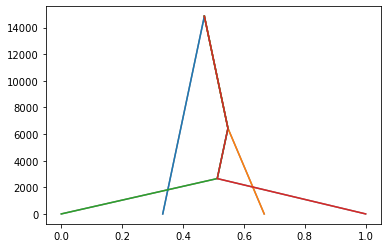

In [36]:
for p in pm_paths:
    p_times = []
    p_locs = []
    for n in p:
        p_times.append(pm_times[n])
        p_locs.append(pm_locations[n])
    plt.plot(p_locs, p_times, color="grey")
for p in td_paths:
    p_times = []
    p_locs = []
    for n in p:
        p_times.append(td_times[n])
        p_locs.append(td_locations[n])
    plt.plot(p_locs, p_times)